In [2]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import utils.spike_utils as spike_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData

In [3]:
PRE_INTERVAL = 1300
POST_INTERVAL = 1500
INTERVAL_SIZE = 100
EVENT = "FeedbackOnset"

# output dir that was specified in the decode_features_with_pseudo.py
OUTPUT_DIR = "/data/patrick_res/pseudo"
HYAK_OUTPUT_DIR = "/data/patrick_res/hyak/pseudo"
SESSIONS_PATH = "/data/patrick_res/multi_sess/valid_sessions_rpe.pickle"

FEATURE_DIMS = ["Color", "Shape", "Pattern"]

### Choice vs. FB feature projections

Text(0.5, 1.0, 'RPE Group')

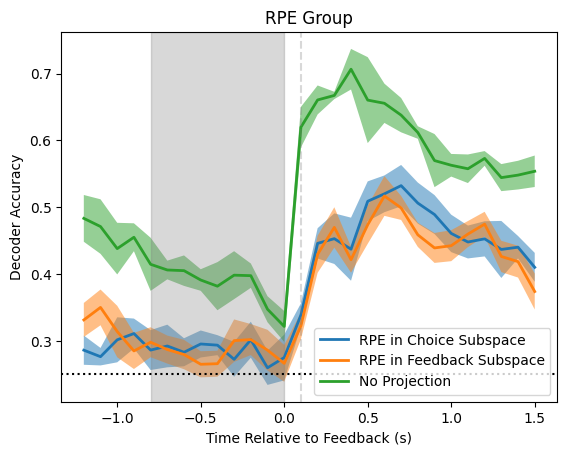

In [4]:
fig, ax = plt.subplots()

fb_proj_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"rpe_groups_orth_many_fb_test_accs.npy"))
choic_proj_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"rpe_groups_orth_many_choice_test_accs.npy"))
base_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"rpe_groups__test_accs.npy"))
visualization_utils.visualize_accuracy_across_time_bins(
    fb_proj_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"RPE in Choice Subspace",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    choic_proj_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"RPE in Feedback Subspace",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    base_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"No Projection",
    right_align=True, 
)
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")
ax.set_title("RPE Group")

### High val vs. random feature fb projections

Text(0.5, 1.0, 'RPE Group')

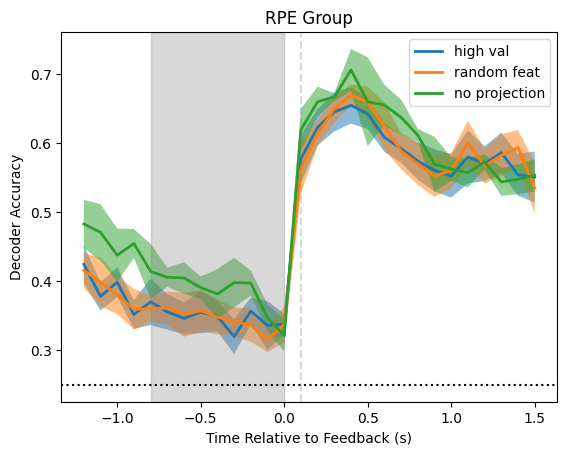

In [7]:
fig, ax = plt.subplots()

high_val_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"rpe_groups_high_val_fb_all_test_accs.npy"))
random_feat_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"rpe_groups_random_feat_fb_all_test_accs.npy"))
base_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"rpe_groups__test_accs.npy"))
visualization_utils.visualize_accuracy_across_time_bins(
    high_val_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"high val",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    random_feat_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"random feat",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    base_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"no projection",
    right_align=True, 
)
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")
ax.set_title("RPE Group")

### Are the confidence quartiles decodable?

Text(0.5, 1.0, 'RPE Group')

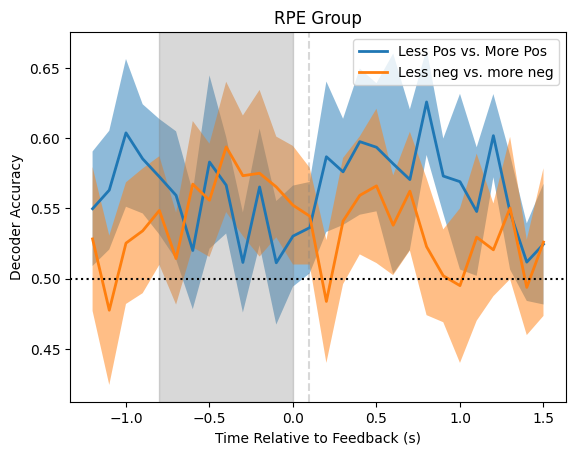

In [4]:
fig, ax = plt.subplots()
cor_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"rpe_groups_orth_many_fb_cor_bal_test_accs.npy"))
inc_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"rpe_groups_orth_many_fb_inc_bal_test_accs.npy"))
cor_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"rpe_groups_orth_many_fb_cor_bal_test_accs.npy"))
inc_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"rpe_groups_orth_many_fb_inc_bal_test_accs.npy"))
# choic_proj_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"rpe_groups_orth_many_choice_test_accs.npy"))
base_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"rpe_groups__test_accs.npy"))
visualization_utils.visualize_accuracy_across_time_bins(
    cor_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Less Pos vs. More Pos",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    inc_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Less neg vs. more neg",
    right_align=True, 
)
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.5, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")
ax.set_title("RPE Group")

### Just confidence

Text(0.5, 1.0, 'High vs. Low Confidence')

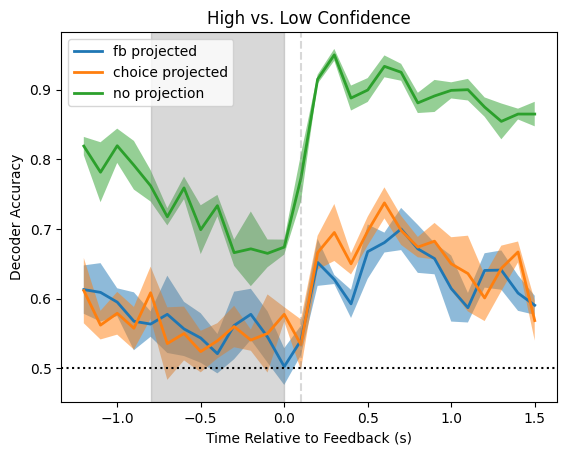

In [10]:
fig, ax = plt.subplots()

fb_proj_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"confidence_groups_orth_fb_test_accs.npy"))
choic_proj_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"confidence_groups_orth_choice_test_accs.npy"))
base_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"confidence_groups_no_proj_test_accs.npy"))
visualization_utils.visualize_accuracy_across_time_bins(
    fb_proj_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"fb projected",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    choic_proj_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"choice projected",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    base_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"no projection",
    right_align=True, 
)
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.5, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")
ax.set_title("High vs. Low Confidence")

### Just feedback

Text(0.5, 1.0, 'Correct vs. Incorrect Feedback')

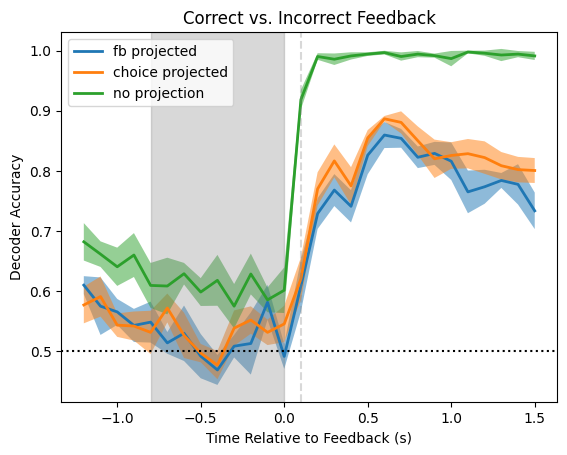

In [11]:
fig, ax = plt.subplots()

fb_proj_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"feedback_orth_fb_test_accs.npy"))
choic_proj_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"feedback_orth_choice_test_accs.npy"))
base_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"feedback_no_proj_test_accs.npy"))
visualization_utils.visualize_accuracy_across_time_bins(
    fb_proj_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"fb projected",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    choic_proj_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"choice projected",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    base_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"no projection",
    right_align=True, 
)
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.5, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")
ax.set_title("Correct vs. Incorrect Feedback")